In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from datetime import datetime
import time
import matplotlib.pyplot as plt
import math as math



## Part1


Creating a function to import both option data and equity data

- Finding the type of option from the option name
- Creating organized data frame

In [2]:
# Importing option chain from yahoo finance, and organizing the dataframe  

def get_optionchain(inpt,exprdt):
    
# expiration date format should be like this "2020-03-12"
    
       
    stock=yf.Ticker(inpt)
    
    
    opt=stock.option_chain(exprdt)
    
    
    call=opt.calls
    
    put=opt.puts
    
    option_chain=call.append(put)
    
    
    
    
    
    a=option_chain.drop(["lastTradeDate","change","percentChange","volume","openInterest","inTheMoney","contractSize","currency"],axis=1)
    
    a["Expiration Date"]=exprdt
    
    #a.columns(["Option Name",])
    
    
    a.columns=['Option Name', 'Strike',"Last Price","Bid","Ask","Implied Volatility","Expiration Date"]
    
    a.reset_index(drop=True,inplace=True)
    
    
    
    # Loop to assign P or C values depending on the type of the option
    for i,j in a.iterrows():
        
        if j["Option Name"][-9]=="P":
                
       
            a.loc[i,"Type"]="P"
        
        
        
        
        elif j["Option Name"][-9]=="C":
                
        
            a.loc[i,"Type"]="C"
        
        
        
        
        
    
    
    a = a[['Option Name',"Expiration Date","Type",'Strike',"Bid","Ask","Last Price","Implied Volatility"]]
    
    #a=a.drop(["index"],axis=1)
    
    
    #a=a.reset_index()
    
    a.sort_values(by=['Strike'], inplace=True, ascending=True)

    
    
    return a
    

AMZN option chain with different maturities

In [4]:
# AMZN option and stock data


a1=get_optionchain("AMZN",exprdt="2021-03-05")
a2=get_optionchain("AMZN",exprdt="2021-03-26")
a3=get_optionchain("AMZN",exprdt="2021-04-16")


AMZN_opt1=a1.append(a2).append(a3)

AMZN_opt1=AMZN_opt1.reset_index()

AMZN_opt1


# AMZN Stock price 3112

,index,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
0,0,AMZN210305C01910000,2021-03-05,C,1910.0,1197.00,1203.60,1187.12,1.908936
1,236,AMZN210305P01910000,2021-03-05,P,1910.0,0.00,0.01,0.06,1.093755
2,1,AMZN210305C01920000,2021-03-05,C,1920.0,1182.65,1186.65,1165.07,0.000010
3,237,AMZN210305P01920000,2021-03-05,P,1920.0,0.01,0.24,0.06,1.353519
4,238,AMZN210305P01930000,2021-03-05,P,1930.0,0.01,0.24,0.33,1.339847
...,...,...,...,...,...,...,...,...,...
1149,338,AMZN210416P05200000,2021-04-16,P,5200.0,2088.80,2095.20,2113.00,0.629063
1150,339,AMZN210416P05250000,2021-04-16,P,5250.0,2136.25,2145.40,1995.50,0.607365
1151,163,AMZN210416C05250000,2021-04-16,C,5250.0,0.06,0.80,0.66,0.506841
1152,164,AMZN210416C05300000,2021-04-16,C,5300.0,0.10,0.34,0.59,0.504155


SPY option chain with different maturities

In [6]:
# SPY option and stock data


s1=get_optionchain("SPY",exprdt="2021-03-05")
s2=get_optionchain("SPY",exprdt="2021-03-26")
s3=get_optionchain("SPY",exprdt="2021-04-16")


SPY_opt1=s1.append(s2).append(s3)

SPY_opt1=SPY_opt1.reset_index()

SPY_opt1


# SPY  price 388.01

,index,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
0,0,SPY210305C00190000,2021-03-05,C,190.0,196.90,197.65,201.28,0.000010
1,131,SPY210305P00190000,2021-03-05,P,190.0,0.00,0.01,0.01,1.812501
2,132,SPY210305P00195000,2021-03-05,P,195.0,0.00,0.01,0.01,1.750001
3,1,SPY210305C00195000,2021-03-05,C,195.0,191.88,192.59,186.84,0.000010
4,133,SPY210305P00200000,2021-03-05,P,200.0,0.00,0.01,0.01,1.687502
...,...,...,...,...,...,...,...,...,...
853,381,SPY210416P00500000,2021-04-16,P,500.0,117.65,118.42,132.88,0.616093
854,185,SPY210416C00505000,2021-04-16,C,505.0,0.01,0.02,0.02,0.251961
855,186,SPY210416C00510000,2021-04-16,C,510.0,0.00,0.00,0.01,0.125009
856,187,SPY210416C00515000,2021-04-16,C,515.0,0.01,0.02,0.02,0.267585


VIX option chain with different maturities

In [8]:
# VIX option and stock data


v1=get_optionchain("^VIX",exprdt="2021-03-10")
v2=get_optionchain("^VIX",exprdt="2021-03-24")
v3=get_optionchain("^VIX",exprdt="2021-04-21")


VIX_opt1=v1.append(v2).append(v3)

VIX_opt1=VIX_opt1.reset_index()

VIX_opt1


# VIX value is 23.76

,index,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
0,29,VIXW210310P00012000,2021-03-10,P,12.0,NaN,0.00,0.02,0.500005
1,30,VIXW210310P00014000,2021-03-10,P,14.0,0.0,0.03,0.03,1.375003
2,0,VIXW210310C00015000,2021-03-10,C,15.0,8.6,10.37,11.14,2.796878
3,31,VIXW210310P00015000,2021-03-10,P,15.0,0.0,0.05,0.13,1.312503
4,1,VIXW210310C00016000,2021-03-10,C,16.0,7.5,9.28,9.80,2.382817
...,...,...,...,...,...,...,...,...,...
179,80,VIX210421P00130000,2021-04-21,P,130.0,0.0,0.00,103.70,0.000010
180,43,VIX210421C00140000,2021-04-21,C,140.0,0.0,0.10,0.10,1.789064
181,81,VIX210421P00140000,2021-04-21,P,140.0,0.0,0.00,113.69,0.000010
182,44,VIX210421C00150000,2021-04-21,C,150.0,0.0,0.10,0.05,1.843751


### Part1.3

AMZN is the ticker name  of Amazon.Inc traded on Nasdaq.

SPY is well diversified basket of assets. it is consisted of the stocks in S&P 500 stocks
The aim is to produce an investment vehicle that replicates S&P500 index's return

VIX is CBOE volatility index, real time market index representing the markets expectation 
for upcoming 30days

Option symbol is created by ticker of the equity, last two digit of the expiration date

two digits of the expiration month and two digits of expiration date, then type of the Call C or P 

and lastly strike price of the option. Hence, we can determine the option expiration from the symbol.

For example, AMZN210226C01800000, This is a option of Amazon, expiration date: 2021-02-26.
It is a call option and the strike price is 1800



AMZN Stock price 3112

SPY  price 388.01

VIX value is 23.76

risk free rate=0.0008


## Part 2

### Blackscholes 

In [ ]:
## Blackscholes function to calulate option price

# S= Stock Price

# K= Strike Price

# t= Expiration Date

# sig= Volatility

# optype= Type

# r= risk free interest rate



def blackscholes(S,K,t,optype,sig,r=0.0008):
    
    d1= (np.log(S/K)+(r+sig**2/2)*t)/(sig*np.sqrt(t))
    
    d2= d1-sig*np.sqrt(t)
        
    call_price=norm.cdf(d1,0,1)*S-  norm.cdf(d2,0,1)*K*np.exp(-r*t)
           
    put_price = K* np.exp(-r*t)* norm.cdf(-d2,0,1) -  S* norm.cdf(-d1,0,1)
    
    if optype== "C":
        
        return call_price
    
    elif optype=="P":
        
        return put_price
    
    

Implementing blackscholes for Amazon

In [11]:
# Implementing blackscholes for Amazon

blackscholes(S=3112,K=5250,t=46/365,optype="C",sig=0.2)

3.3532187533524453e-12

Implementing blackscholes for SPY

In [12]:
# Implementing blackscholes for SPY

blackscholes(S=388,K=515,t=46/365,optype="P",sig=0.2)

126.94831967356708

### Bisection Method

In [87]:
# bisection function compatible with apply function


def bisection(row):
    
    S=3140
    K=row["Strike"]
    optype=row["Type"]
    

    
    today = datetime.today()
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    t=(exp-today).days
    
    
    
    avr_price=(row["Bid"]+row["Ask"])/2
    
    
    
    a= 0.01
    
    b=1
    
    
    
    
            
    f_b=blackscholes(S,K,t,optype,b)-avr_price
        
    f_a=blackscholes(S,K,t,optype,a)-avr_price
    
    count=0
    
    while b-a>0.01:
            
            
            count+=1
            
            if count>1000:
                
                break
            
            
                      
            
            
            c=a+b/2
            
            f_c=blackscholes(S,K,t,optype,c)-avr_price
            
            f_b=blackscholes(S,K,t,optype,b)-avr_price
        
            f_a=blackscholes(S,K,t,optype,a)-avr_price
        
            
            
            if f_c<0.01:
                
                break
            
            
            if f_c*f_b<0:
                
                a=c
                
                
                                                                
            
            elif f_c*f_a<0:
                
                
                b=c
                
                
                
        


    return c
           

In [190]:

# Creating a small dataframe of AMAZON

amzn=AMZN_opt1.loc[477:570]
amzn

,index,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
477,164,AMZN210326P01870000,2021-03-26,P,1870.0,0.40,1.29,1.80,0.750491
478,165,AMZN210326P01890000,2021-03-26,P,1890.0,0.42,1.37,1.70,0.740725
479,166,AMZN210326P01920000,2021-03-26,P,1920.0,0.56,1.48,1.00,0.730227
480,167,AMZN210326P01950000,2021-03-26,P,1950.0,0.69,1.60,1.55,0.718509
481,168,AMZN210326P01970000,2021-03-26,P,1970.0,0.70,1.48,1.43,0.700076
...,...,...,...,...,...,...,...,...,...
566,25,AMZN210326C02780000,2021-03-26,C,2780.0,341.50,351.50,326.88,0.379836
567,228,AMZN210326P02790000,2021-03-26,P,2790.0,17.80,18.45,29.50,0.362128
568,26,AMZN210326C02790000,2021-03-26,C,2790.0,332.50,342.50,318.20,0.377066
569,229,AMZN210326P02800000,2021-03-26,P,2800.0,18.65,19.40,18.20,0.359259


In [191]:
# example using bisection with apply function
amzn_vol=amzn.apply(lambda row: bisection(row),axis=1)
amzn_vol


477    0.035313
478    0.035313
479    0.035313
480    0.035313
481    0.035313
         ...   
566    0.510000
567    0.021914
568    0.510000
569    0.021914
570    0.510000
Length: 94, dtype: float64

Bisection Method Implementation for AMZN

In [192]:
amzn_vol=amzn_vol.to_frame()

amzn_vol.columns=["Computed Implied Vol"]


amzn_vol

,Computed Implied Vol
477,0.035313
478,0.035313
479,0.035313
480,0.035313
481,0.035313
...,...
566,0.510000
567,0.021914
568,0.510000
569,0.021914


In [146]:
# Creating a small dataframe of SPY

spy=SPY_opt1.loc[477:570]
spy

,index,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
477,189,SPY210416P00170000,2021-04-16,P,170.0,0.05,0.06,0.10,0.818361
478,1,SPY210416C00175000,2021-04-16,C,175.0,199.35,200.23,195.70,0.000010
479,190,SPY210416P00175000,2021-04-16,P,175.0,0.06,0.07,0.07,0.804689
480,191,SPY210416P00180000,2021-04-16,P,180.0,0.06,0.08,0.06,0.783205
481,2,SPY210416C00180000,2021-04-16,C,180.0,206.74,207.63,194.00,0.000010
...,...,...,...,...,...,...,...,...,...
566,40,SPY210416C00300000,2021-04-16,C,300.0,87.44,87.89,85.84,0.000010
567,239,SPY210416P00300000,2021-04-16,P,300.0,0.88,0.90,0.88,0.417975
568,41,SPY210416C00301000,2021-04-16,C,301.0,86.74,87.19,82.74,0.315437
569,240,SPY210416P00301000,2021-04-16,P,301.0,0.89,0.91,0.87,0.414435


In [147]:
spy_vol=spy.apply(lambda row: bisection(row),axis=1)
spy_vol

477    0.08125
478    0.51000
479    0.08125
480    0.08125
481    0.51000
        ...   
566    0.51000
567    0.08125
568    0.51000
569    0.08125
570    0.51000
Length: 94, dtype: float64

Bisection Method Implementation for SPY

In [148]:
spy_vol=spy_vol.to_frame()

spy_vol.columns=["Computed Implied Vol"]
spy_vol


,Computed Implied Vol
477,0.08125
478,0.51000
479,0.08125
480,0.08125
481,0.51000
...,...
566,0.51000
567,0.08125
568,0.51000
569,0.08125


### Secant Method

In [157]:
def secant(row):
    
    
    S=3140
    K=row["Strike"]
    optype=row["Type"]
    

    
    today = datetime.today()
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    t=(exp-today).days
    
    
    
    avr_price=(row["Bid"]+row["Ask"])/2
    
    
    
    a= 0.01
    
    b=1
    
    
    
            
    f_b=blackscholes(S,K,t,optype,b)-avr_price
        
    f_a=blackscholes(S,K,t,optype,a)-avr_price
    
    count=0
    
    
    
    #if f_b*f_a<0:
    
    
    while b-a>0.001:


            count+=1

            if count>800:

                break





            c=(a*f_b-b*f_a)/(f_b-f_a)

            f_c=blackscholes(S,K,t,optype,c)-avr_price

            f_b=blackscholes(S,K,t,optype,b)-avr_price

            f_a=blackscholes(S,K,t,optype,a)-avr_price



            if f_c<0.01:

                break


            if f_c*f_b<0:

                a=c


            elif f_c*f_a<0:


                b=c

    
    return c
    
    

Secant Method Implementation for AMZN

In [ ]:
amzn_vol_secant=amzn.apply(lambda row: secant(row),axis=1)

amzn_vol_secant

In [159]:
amzn_vol_secant=amzn_vol_secant.to_frame()
amzn_vol_secant.columns=["Computed Implied Vol"]
amzn_vol_secant

,Computed Implied Vol
477,0.010465
478,0.010487
479,0.010546
480,0.010604
481,0.010569
...,...
566,-0.014500
567,0.016619
568,-0.014123
569,0.016914


Measuring the time difference between biscection method and secant method
- As it can be seen below, it is obvious that secant method take much less time to find the root

In [161]:
# Measuring time spent on bisection method

start = time.time()

amzn_vol=amzn.apply(lambda row: bisection(row),axis=1)
#amzn_vol


end = time.time()

print(end-start)

32.12326979637146


In [162]:
# Measuring time spent on secant method

start = time.time()

amzn_vol=amzn.apply(lambda row: secant(row),axis=1)
#amzn_vol


end = time.time()

print(end-start)

0.4698491096496582


In [ ]:
amzn["Bisection vol"]=amzn_vol
amzn

In [194]:
amzn["Secant Vol"]=amzn_vol_secant
amzn

<ipython-input-194-47a7e7010b5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn["Secant Vol"]=amzn_vol_secant


,index,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility,Bisection vol,Secant Vol
477,164,AMZN210326P01870000,2021-03-26,P,1870.0,0.40,1.29,1.80,0.750491,0.035313,0.010465
478,165,AMZN210326P01890000,2021-03-26,P,1890.0,0.42,1.37,1.70,0.740725,0.035313,0.010487
479,166,AMZN210326P01920000,2021-03-26,P,1920.0,0.56,1.48,1.00,0.730227,0.035313,0.010546
480,167,AMZN210326P01950000,2021-03-26,P,1950.0,0.69,1.60,1.55,0.718509,0.035313,0.010604
481,168,AMZN210326P01970000,2021-03-26,P,1970.0,0.70,1.48,1.43,0.700076,0.035313,0.010569
...,...,...,...,...,...,...,...,...,...,...,...
566,25,AMZN210326C02780000,2021-03-26,C,2780.0,341.50,351.50,326.88,0.379836,0.510000,-0.014500
567,228,AMZN210326P02790000,2021-03-26,P,2790.0,17.80,18.45,29.50,0.362128,0.021914,0.016619
568,26,AMZN210326C02790000,2021-03-26,C,2790.0,332.50,342.50,318.20,0.377066,0.510000,-0.014123
569,229,AMZN210326P02800000,2021-03-26,P,2800.0,18.65,19.40,18.20,0.359259,0.021914,0.016914


### Put Call parity 

In [197]:
def put_call_parity(row):
    
    S=3140
    K=row["Strike"]
    opttype=row["Type"]
    price=row["Last Price"]
    
    r=0.0008
    
    
    
    today = datetime.today()
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    t=(exp-today).days
    
    
    
    
    if opttype=="C":
        
        
        Calculated_Put= price-S+K*np.exp(-r*t)
        
        row["Calculated Put"]=Calculated_Put
        
    
    elif opttype=="P":
        
        Calculated_Call=S+price- K*np.exp(-r*t)
        
        #print(Calculated_Call)
        
        row["Calculated Call"]=Calculated_Call
        
    
    
    
    
        
        
    return row
           
    

- From the table we can see that calculated price of the option using put call parity is vey close to the bid and ask given in the table

In [199]:
AMZN_opt1.apply(lambda row: put_call_parity(row),axis=1 )

,Ask,Bid,Calculated Call,Calculated Put,Expiration Date,Implied Volatility,Last Price,Option Name,Strike,Type,index
0,1203.60,1197.00,NaN,-47.458504,2021-03-05,1.908936,1187.12,AMZN210305C01910000,1910.0,C,0
1,0.01,0.00,1234.638504,NaN,2021-03-05,1.093755,0.06,AMZN210305P01910000,1910.0,P,236
2,1186.65,1182.65,NaN,-59.532475,2021-03-05,0.000010,1165.07,AMZN210305C01920000,1920.0,C,1
3,0.24,0.01,1224.662475,NaN,2021-03-05,1.353519,0.06,AMZN210305P01920000,1920.0,P,237
4,0.24,0.01,1214.956446,NaN,2021-03-05,1.339847,0.33,AMZN210305P01930000,1930.0,P,238
...,...,...,...,...,...,...,...,...,...,...,...
1149,2095.20,2088.80,236.870474,NaN,2021-04-16,0.629063,2113.00,AMZN210416P05200000,5200.0,P,338
1150,2145.40,2136.25,71.138459,NaN,2021-04-16,0.607365,1995.50,AMZN210416P05250000,5250.0,P,339
1151,0.80,0.06,NaN,1925.021541,2021-04-16,0.506841,0.66,AMZN210416C05250000,5250.0,C,163
1152,0.34,0.10,NaN,1973.183555,2021-04-16,0.504155,0.59,AMZN210416C05300000,5300.0,C,164


In [200]:
AMZN_calls=AMZN_opt1[AMZN_opt1["Type"]=="C"]



In [201]:
cal_call=AMZN_opt1.apply(lambda row: put_call_parity(row),axis=1 )[["Option Name","Expiration Date","Calculated Call"]].dropna()
cal_call


,Option Name,Expiration Date,Calculated Call
1,AMZN210305P01910000,2021-03-05,1234.638504
3,AMZN210305P01920000,2021-03-05,1224.662475
4,AMZN210305P01930000,2021-03-05,1214.956446
5,AMZN210305P01950000,2021-03-05,1194.864388
7,AMZN210305P01960000,2021-03-05,1184.748360
...,...,...,...
1145,AMZN210416P05100000,2021-04-16,6.734503
1147,AMZN210416P05150000,2021-04-16,52.752489
1149,AMZN210416P05200000,2021-04-16,236.870474
1150,AMZN210416P05250000,2021-04-16,71.138459


In [202]:
AMZN_calls=AMZN_opt1[AMZN_opt1["Type"]=="C"]
AMZN_calls[["Expiration Date","Last Price"]]

,Expiration Date,Last Price
0,2021-03-05,1187.12
2,2021-03-05,1165.07
6,2021-03-05,1091.07
8,2021-03-05,1149.16
9,2021-03-05,1086.35
...,...,...
1144,2021-04-16,0.74
1146,2021-04-16,0.64
1148,2021-04-16,0.63
1151,2021-04-16,0.66


In [204]:
cal_put=AMZN_opt1.apply(lambda row: put_call_parity(row),axis=1 )[["Option Name","Expiration Date","Calculated Put"]].dropna()
cal_put

,Option Name,Expiration Date,Calculated Put
0,AMZN210305C01910000,2021-03-05,-47.458504
2,AMZN210305C01920000,2021-03-05,-59.532475
6,AMZN210305C01950000,2021-03-05,-103.604388
8,AMZN210305C01960000,2021-03-05,-35.538360
9,AMZN210305C01980000,2021-03-05,-78.396302
...,...,...,...
1144,AMZN210416C05100000,2021-04-16,1780.405497
1146,AMZN210416C05150000,2021-04-16,1828.537511
1148,AMZN210416C05200000,2021-04-16,1876.759526
1151,AMZN210416C05250000,2021-04-16,1925.021541


In [205]:
AMZN_puts=AMZN_opt1[AMZN_opt1["Type"]=="P"]
az=AMZN_puts[["Expiration Date","Last Price"]]
az

,Expiration Date,Last Price
1,2021-03-05,0.06
3,2021-03-05,0.06
4,2021-03-05,0.33
5,2021-03-05,0.19
7,2021-03-05,0.05
...,...,...
1145,2021-04-16,1786.40
1147,2021-04-16,1880.65
1149,2021-04-16,2113.00
1150,2021-04-16,1995.50


### Plotting

In [207]:
AMZN_opt1.loc[(AMZN_opt1["Type"]=="C")&(AMZN_opt1["Expiration Date"]=="2021-03-05")]

,index,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
0,0,AMZN210305C01910000,2021-03-05,C,1910.0,1197.00,1203.60,1187.12,1.908936
2,1,AMZN210305C01920000,2021-03-05,C,1920.0,1182.65,1186.65,1165.07,0.000010
6,2,AMZN210305C01950000,2021-03-05,C,1950.0,1154.20,1159.10,1091.07,0.000010
8,3,AMZN210305C01960000,2021-03-05,C,1960.0,1147.00,1152.90,1149.16,1.747560
9,4,AMZN210305C01980000,2021-03-05,C,1980.0,1127.80,1131.00,1086.35,1.312503
...,...,...,...,...,...,...,...,...,...
469,231,AMZN210305C04600000,2021-03-05,C,4600.0,0.00,0.09,0.40,0.996094
470,232,AMZN210305C04700000,2021-03-05,C,4700.0,0.00,0.23,0.01,1.122075
472,233,AMZN210305C04800000,2021-03-05,C,4800.0,0.00,0.00,0.01,0.500005
475,234,AMZN210305C04900000,2021-03-05,C,4900.0,0.00,0.09,0.01,1.140629


- According to plots below, it could be say that there is a smile shape in the plot.
- In some place of the graph data is randomly scatter, it might be due to missing data issues

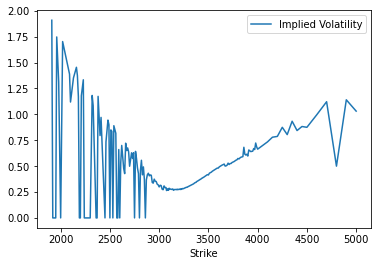

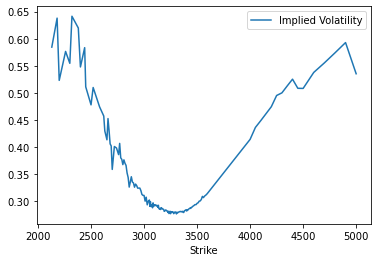

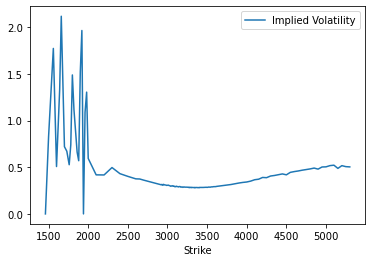

In [211]:
## Plotting


#plt.plot(AMZN_opt1.loc[(AMZN_opt1["Type"]=="C")&(AMZN_opt1["Expiration Date"]=="2021-03-26")])
a=AMZN_opt1.loc[(AMZN_opt1["Type"]=="C")&(AMZN_opt1["Expiration Date"]=="2021-03-05")]
b=AMZN_opt1.loc[(AMZN_opt1["Type"]=="C")&(AMZN_opt1["Expiration Date"]=="2021-03-26")]
c=AMZN_opt1.loc[(AMZN_opt1["Type"]=="C")&(AMZN_opt1["Expiration Date"]=="2021-04-16")]
#plt.plot(a[["Computed Vol","Strike"]],x="Strike",y="Computed Vol")

a.plot(x="Strike", y="Implied Volatility")

b.plot(x="Strike", y="Implied Volatility")

c.plot(x="Strike", y="Implied Volatility")


### Greeks

In [212]:
### Greeks

def d(row):
    
    
    S=3140
    
    K=row["Strike"]
    
    r=0.0008
    
    sig=row["Implied Volatility"]
    
        
    today = datetime.today()
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    t=(exp-today).days
    
    
    d1= 1/(sig*np.sqrt(t))  * (np.log(S/K) + (r+ sig**2/2)*t)
    
    d2= d1- sig*np.sqrt(t)
    
    return d1,d2


In [222]:
#delta calculation

def delta(row):
    
    
      
    S=3140
    
    K=row["Strike"]
    
    r=0.0008
    
    sig=row["Implied Volatility"]
    
        
    today = datetime.today()
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    t=(exp-today).days
    
    
    d1= 1/(sig*np.sqrt(t))  * (np.log(S/K) + (r+ sig**2/2)*t)
    
    
    
    if row["Type"]=="C":
        
        delta_call=norm.cdf(d1)
        
        return delta_call
        
    elif row["Type"]=="P":
        
        delta_put=norm.cdf(-d1)
        
        return delta_put
    
    

In [270]:
amzn_delta=AMZN_opt1.apply(lambda row: delta(row),axis=1)

amzn_delta=amzn_delta.to_frame()

amzn_delta.columns=["delta"]

amzn_delta




,delta
0,0.964405
1,0.112968
2,1.000000
3,0.083328
4,0.085172
...,...
1149,0.022808
1150,0.027439
1151,0.940550
1152,0.939050


In [230]:
## Gamma

def gamma(row):
    
    
    
    S=3140
    
    K=row["Strike"]
    
    r=0.0008
    
    sig=row["Implied Volatility"]
    
        
    today = datetime.today()
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    t=(exp-today).days
    
    
    d1= 1/(sig*np.sqrt(t))  * (np.log(S/K) + (r+ sig**2/2)*t)
    
    d2= d1- sig*np.sqrt(t)
    
    
    
    gamma= K*np.exp(-r*t)*norm.pdf(d2)/(S**2*sig*np.sqrt(t))
    

    return(gamma)
    
    
    
    


In [269]:
amzn_gamma=AMZN_opt1.apply(lambda row: gamma(row),axis=1)

amzn_gamma=amzn_gamma.to_frame()

amzn_gamma.columns=["gamma"]

amzn_gamma



,gamma
0,0.000008
1,0.000032
2,0.000000
3,0.000021
4,0.000021
...,...
1149,0.000004
1150,0.000005
1151,0.000011
1152,0.000011


In [239]:
## Theta


def theta(row):
    
    
    S=3140
    
    K=row["Strike"]
    
    r=0.0008
    
    sig=row["Implied Volatility"]
    
        
    today = datetime.today()
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    t=(exp-today).days
    
    
    d1= 1/(sig*np.sqrt(t))  * (np.log(S/K) + (r+ sig**2/2)*t)
    
    d2= d1- sig*np.sqrt(t)

    
    
     
    if row["Type"]=="C":
        
        theta_call= -S*sig*norm.pdf(d1)/(2*np.sqrt(t)) - r*K*np.exp(-r*t)*norm.cdf(d2)
        
        return theta_call*100/365
        
       
        
    elif row["Type"]=="P":
        
        theta_put= - S*sig*norm.pdf(-d1)/(2*np.sqrt(t)) - r*K* np.exp(-r*t)*norm.cdf(-d2)
        
        return theta_put*100/365
        
        
        
        
    
    
    

In [240]:
amzn_theta=AMZN_opt1.apply(lambda row: theta(row),axis=1)


amzn_theta=amzn_theta.to_frame()

amzn_theta.columns=["theta"]

amzn_theta




,theta
0,-37.168706
1,-52.371493
2,-0.419813
3,-51.880288
4,-52.205079
...,...
1149,-3.267377
1150,-3.553049
1151,-3.880027
1152,-3.935766


In [242]:
def vega(row):
    
    
    S=3140
    
    K=row["Strike"]
    
    r=0.0008
    
    
    
    sig=row["Implied Volatility"]
    
        
    today = datetime.today()
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    t=(exp-today).days
    
    
    d1= 1/(sig*np.sqrt(t))  * (np.log(S/K) + (r+ sig**2/2)*t)
    
    
    
    vega= S*norm.pdf(d1)*np.sqrt(t)
    
    
    return vega/100

    
    

In [271]:
amzn_vega=AMZN_opt1.apply(lambda row: vega(row),axis=1)


amzn_vega=amzn_vega.to_frame()

amzn_vega.columns=["vega"]

amzn_vega



,vega
0,4.260940
1,10.423271
2,0.000000
3,8.337754
4,8.475828
...,...
1149,11.396816
1150,13.307181
1151,24.911445
1152,25.402135


In [272]:
horizontal_stack = pd.concat([amzn_delta,amzn_gamma,amzn_vega, amzn_theta], axis=1)
horizontal_stack

,delta,gamma,vega,theta
0,0.964405,0.000008,4.260940,-37.168706
1,0.112968,0.000032,10.423271,-52.371493
2,1.000000,0.000000,0.000000,-0.419813
3,0.083328,0.000021,8.337754,-51.880288
4,0.085172,0.000021,8.475828,-52.205079
...,...,...,...,...
1149,0.022808,0.000004,11.396816,-3.267377
1150,0.027439,0.000005,13.307181,-3.553049
1151,0.940550,0.000011,24.911445,-3.880027
1152,0.939050,0.000011,25.402135,-3.935766


## Part3

In [244]:

def f(x):
    
    if x==0:
        
        return 1
    
    else:
    
        return np.sin(x)/x
    




def trapezoidal(f,a,b,n):
    
    
    h=float(b-a)/n
    
    result=0.5*f(a)+0.5*f(b)
    
    
    
    for i in range(1,n):
        
        result+=f(a+i*h)
        
        
    result*=h
    
    return result


    
    
    
    
    

In [254]:

trapezoidal(f,-1000000,1000000,n=130000)

15.70796091749369

In [247]:
def simpson(f,a,b,n):
    
    
    x=np.linspace(a,b,n+1)
    
    
    integral=0
    
    
    for i in range(len(x)-1):
        
        x1=x[i]
        
        x2=x[i+1]
        
        h=(x2-x1)/2
        
        summ= (h/3)*(f(x1)+4*f((x1+x2)/2)+f(x2))
        
        
        integral+=summ
        
        continue
        
    return integral
    
    

In [255]:
simpson(f,-1000000,1000000,n=130000)

7.330372340238341

- From the table below, it is obvious that error would become to small as n increases

- Trapezoidal is better for large numbers whereas Simpson's rule is much better in small numbers

In [250]:
## Truncation error

def trunctrap_error(trapezoidal,a,b,n):
    
    df_func=[]
    
    df_error=[]
    
    n_steps=[]
    
    a=a
    
    b=b
    
    
    i=0
    while 2**i<n:
    
        func_result=trapezoidal(f,a,b,n=2**i)

        error_result=func_result- np.pi

        n_steps.append(2**i)

        df_func.append(func_result)

        df_error.append(error_result)

        i+=1
        
        
    df=pd.DataFrame({"n":n_steps,"result":df_func,"error":df_error})
    
    
    return df
    
    

In [251]:
## Truncation for trapezoidal

trunctrap_error(trapezoidal,-10**6,10**6,2**21)

,n,result,error
0,1,-0.699987,-3.841580
1,2,999999.650006,999996.508414
2,4,500000.180666,499997.039073
3,8,249998.741156,249995.599563
4,16,125000.782187,124997.640595
5,32,62501.898891,62498.757298
6,64,31249.431008,31246.289416
7,128,15623.160000,15620.018407
8,256,7813.138512,7809.996920
9,512,3905.002313,3901.860721


In [252]:
## Truncation for simpson

def truncsim_error(simpson,a,b,n):
    
    df_func=[]
    
    df_error=[]
    
    n_steps=[]
    
    a=a
    
    b=b
    
    
    i=0
    while 2**i<n:
    
        func_result=simpson(f,a,b,n=2**i)

        error_result=func_result- np.pi

        n_steps.append(2**i)

        df_func.append(func_result)

        df_error.append(error_result)

        i+=1
        
        
    df=pd.DataFrame({"n":n_steps,"result":df_func,"error":df_error})
    
    
    return df
    
    

In [253]:
truncsim_error(simpson,-10**6,10**6,2**21)

,n,result,error
0,1,1.333333e+06,1.333330e+06
1,2,3.333337e+05,3.333305e+05
2,4,1.666649e+05,1.666618e+05
3,8,8.333480e+04,8.333165e+04
4,16,4.166894e+04,4.166580e+04
5,32,2.083194e+04,2.082880e+04
6,64,1.041440e+04,1.041126e+04
7,128,5.209798e+03,5.206656e+03
8,256,2.602290e+03,2.599149e+03
9,512,1.299576e+03,1.296434e+03


- Trapezoidal converges more faster than simpson rule, 15 and 20 respectively

In [256]:
def convergence_trap(trapezoidal,a,b,n, epsilon = 10**-4):
    k=2
    
    a=a
    b=b
    
    while True:
        I_k = trapezoidal(f,a,b,n=(2**k)+1)
        I_k_1 = trapezoidal(f,a,b,n=(2**(k+1)) +1)
        error = abs(I_k_1 - I_k)
        if error<epsilon:
            df1 = pd.DataFrame({"Iterations":[k+1],"Ik":[I_k],"Ik+1":[I_k_1], "Error":[error]})
            return df1
        k+=1

In [257]:
convergence_trap(trapezoidal,-10**6,10**6,2**10, epsilon = 10**-4)

,Iterations,Ik,Ik+1,Error
0,15,-3.141619,-3.141547,0.000072


In [260]:
def convergence_simp(trapezoidal,a,b,n, epsilon = 10**-4):
    k=2
    
    a=a
    b=b
    
    while True:
        I_k = simpson(f,a,b,n=(2**k)+1)
        I_k_1 = simpson(f,a,b,n=(2**(k+1)) +1)
        error = abs(I_k_1 - I_k)
        if error<epsilon:
            df1 = pd.DataFrame({"Iterations":[k+1],"Ik":[I_k],"Ik+1":[I_k_1], "Error":[error]})
            return df1
        k+=1

In [261]:
convergence_simp(simpson,-10**6,10**6,2**10, epsilon = 10**-4)

,Iterations,Ik,Ik+1,Error
0,20,3.141591,3.141591,2.239926e-07
